# Data Analysis

### Imports

In [32]:
import re
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

### Load

In [3]:
data_path = '../data/raw/IMDB-Dataset.csv'
df = pd.read_csv(data_path, header=0)

### Info

In [4]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.review.iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


### Initial Analysis

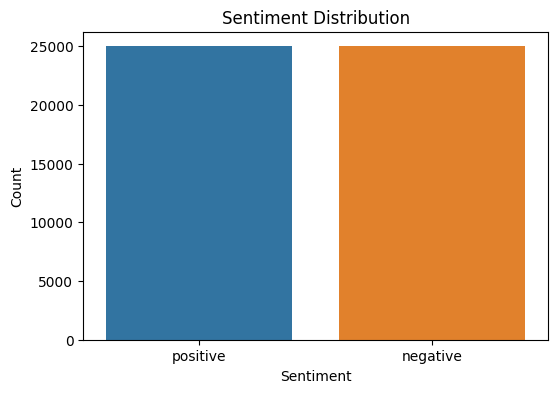

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, hue='sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

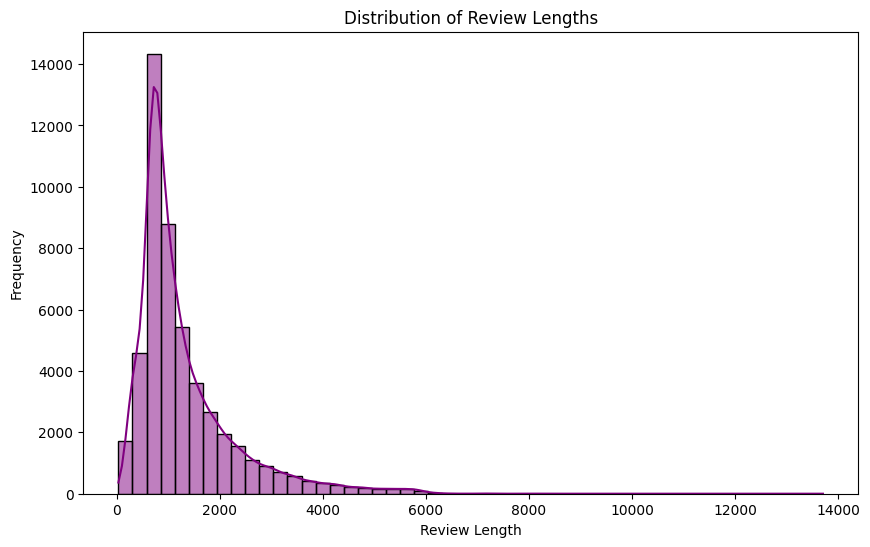

In [14]:
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [16]:
review_length_stats = df['review_length'].describe()
review_length_stats

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64

In [18]:
def plot_wordcloud(reviews, title):
    text = " ".join(reviews)
    stop_words = set(ENGLISH_STOP_WORDS).union(string.punctuation)
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', colormap='viridis', width=800, height=400).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

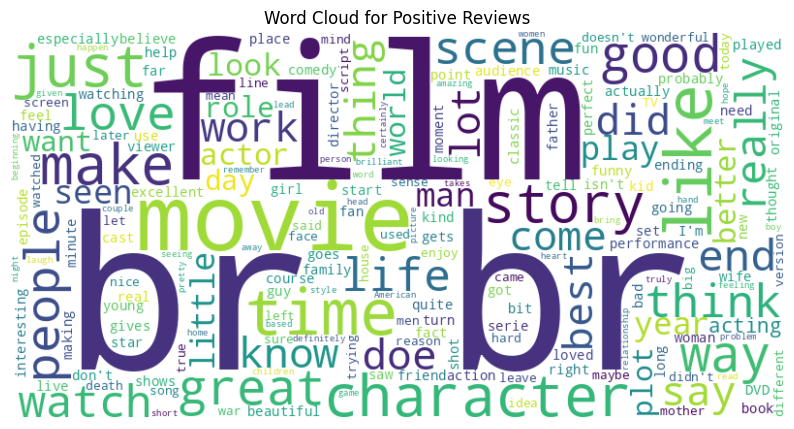

In [24]:
# Word Cloud for Positive Reviews
positive_reviews = df[df['sentiment'] == 'positive']['review']
plot_wordcloud(positive_reviews, "Word Cloud for Positive Reviews")

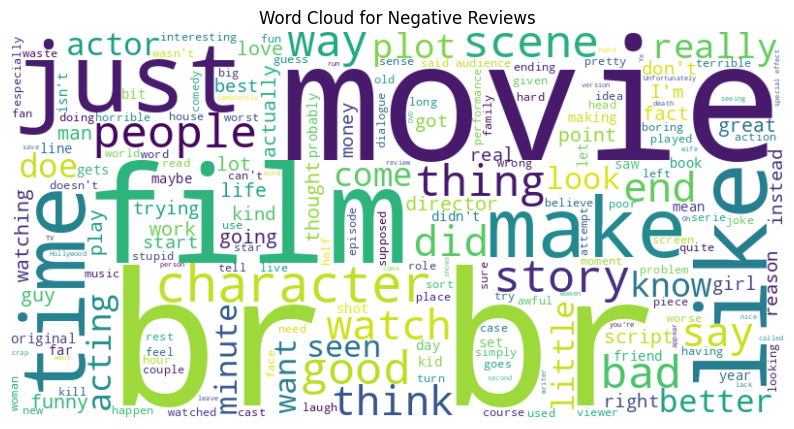

In [25]:
# Word Cloud for Negative Reviews
negative_reviews = df[df['sentiment'] == 'negative']['review']
plot_wordcloud(negative_reviews, "Word Cloud for Negative Reviews")

In [29]:
def common_words(reviews, title):
    words = " ".join(reviews).lower().split()
    stop_words = set(ENGLISH_STOP_WORDS).union(string.punctuation)
    filtered_words = [word for word in words if word not in stop_words]
    word_counts = Counter(filtered_words)
    common_words = word_counts.most_common(10)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis', hue=list(words))
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

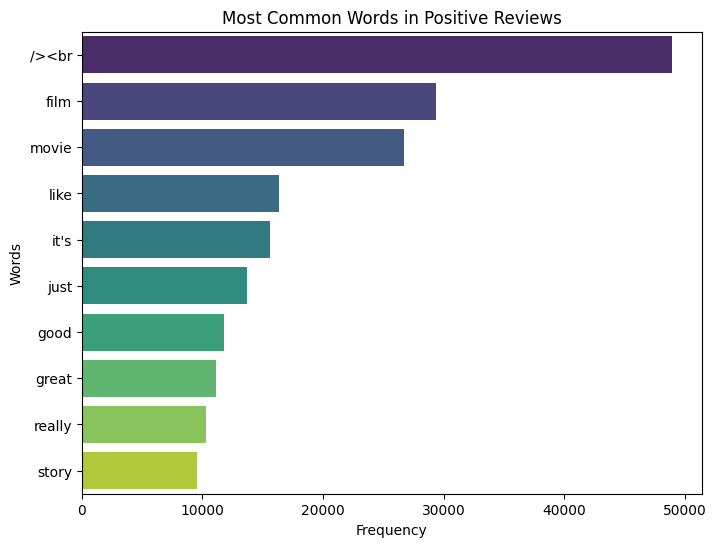

In [30]:
# Common words in positive reviews
common_words(positive_reviews, 'Most Common Words in Positive Reviews')

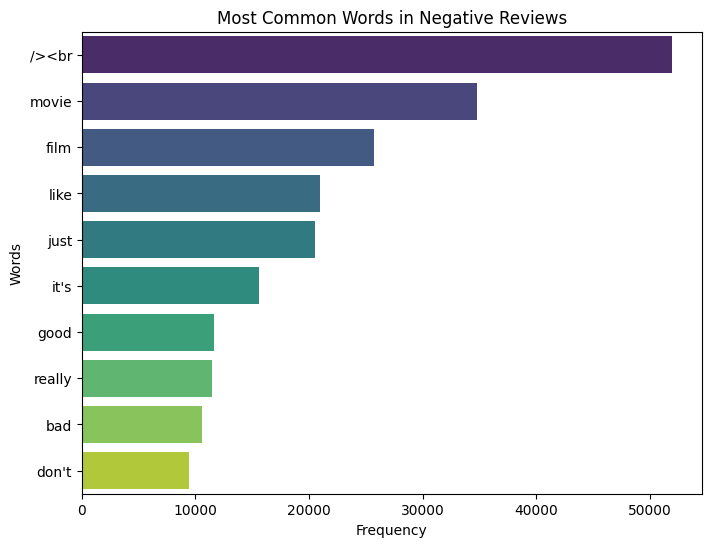

In [31]:
# Common words in negative reviews
common_words(negative_reviews, 'Most Common Words in Negative Reviews')

### Cleaning

In [33]:
# Remove HTML tags and unwanted characters
def clean_text(text):
    text = re.sub(r'<.*?>', '', text) 
    text = re.sub(r'/><br', '', text)
    text = text.lower()
    return text.strip()

### Process

In [36]:
df['review'] = df['review'].apply(clean_text)
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
df = df[['review', 'sentiment']]

In [37]:
df.head(5)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [39]:
df.sentiment.value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [40]:
processed_data_path = '../data/processed/IMBD-Dataset-processed.csv'
df.to_csv(processed_data_path, index=False)